In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [130]:
# import dataset
company_data = pd.read_csv('Company_Data.csv')  
company_data

,Sales,CompPrice,income,Advertising,Population,Price,ShelveLoc,Age,Education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [131]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
company_data['ShelveLoc']= label_encoder.fit_transform(company_data['ShelveLoc']) 

#converting target variable 'Sales' to label as it is nominal or ordinal scale
company_data['Sales']=label_encoder.fit_transform(company_data['Sales'])

In [132]:
company_data.ShelveLoc.unique()

array([0, 1, 2])

In [133]:
company_data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [134]:
company_data.drop(['urban','us'],axis=1,inplace=True)
company_data

,Sales,CompPrice,income,Advertising,Population,Price,ShelveLoc,Age,Education
0,255,138,73,11,276,120,0,42,17
1,297,111,48,16,260,83,1,65,10
2,267,113,35,10,269,80,2,59,12
3,158,117,100,4,466,97,2,55,14
4,37,141,64,3,340,128,0,38,13
5,290,124,113,13,501,72,0,78,16
6,133,115,105,0,45,108,2,71,15
7,306,136,81,15,425,120,1,67,10
8,129,132,110,0,108,124,2,76,10
9,55,132,113,0,131,124,2,76,17


In [135]:
company_data['Status']="<=158"
company_data.loc[company_data['Sales']>=158,'Status']="High"
company_data.loc[company_data['Sales']<=158,'Status']="Low"

In [136]:
##Droping the Sales variable
company_data.drop(["Sales"],axis=1,inplace=True)
company_data

,CompPrice,income,Advertising,Population,Price,ShelveLoc,Age,Education,Status
0,138,73,11,276,120,0,42,17,High
1,111,48,16,260,83,1,65,10,High
2,113,35,10,269,80,2,59,12,High
3,117,100,4,466,97,2,55,14,Low
4,141,64,3,340,128,0,38,13,Low
5,124,113,13,501,72,0,78,16,High
6,115,105,0,45,108,2,71,15,Low
7,136,81,15,425,120,1,67,10,High
8,132,110,0,108,124,2,76,10,Low
9,132,113,0,131,124,2,76,17,Low


In [137]:
colnames = list(company_data.columns)
colnames

['CompPrice',
 'income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Status']

In [138]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in company_data.columns:
    if company_data[column_name].dtype == object:
        company_data[column_name] = le.fit_transform(company_data[column_name])
    else:
        pass

In [139]:
##Splitting the data into featuers and labels
x=company_data.iloc[:,0:8]
y=company_data.iloc[:,8]

In [140]:
x

,CompPrice,income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
5,124,113,13,501,72,0,78,16
6,115,105,0,45,108,2,71,15
7,136,81,15,425,120,1,67,10
8,132,110,0,108,124,2,76,10
9,132,113,0,131,124,2,76,17


In [141]:
pd.set_option("display.max_rows", None) 
y

0      0
1      0
2      0
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     1
23     1
24     0
25     0
26     0
27     1
28     1
29     0
30     0
31     0
32     1
33     0
34     1
35     0
36     0
37     1
38     1
39     1
40     1
41     0
42     0
43     1
44     1
45     1
46     0
47     1
48     1
49     0
50     1
51     1
52     0
53     1
54     1
55     1
56     0
57     1
58     1
59     1
60     0
61     1
62     1
63     0
64     0
65     1
66     0
67     0
68     0
69     0
70     0
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     1
84     1
85     0
86     0
87     0
88     1
89     0
90     1
91     1
92     1
93     0
94     0
95     1
96     0
97     0
98     0
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    1
109    0
110    0
1

In [142]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.4,random_state=20) 

In [143]:
#Building Decision Tree Classifier using Entropy Criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

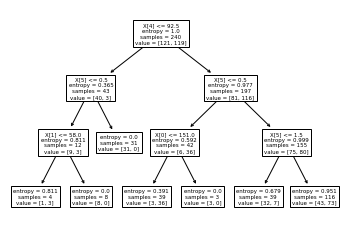

In [144]:
#PLot the decision tree
tree.plot_tree(model);


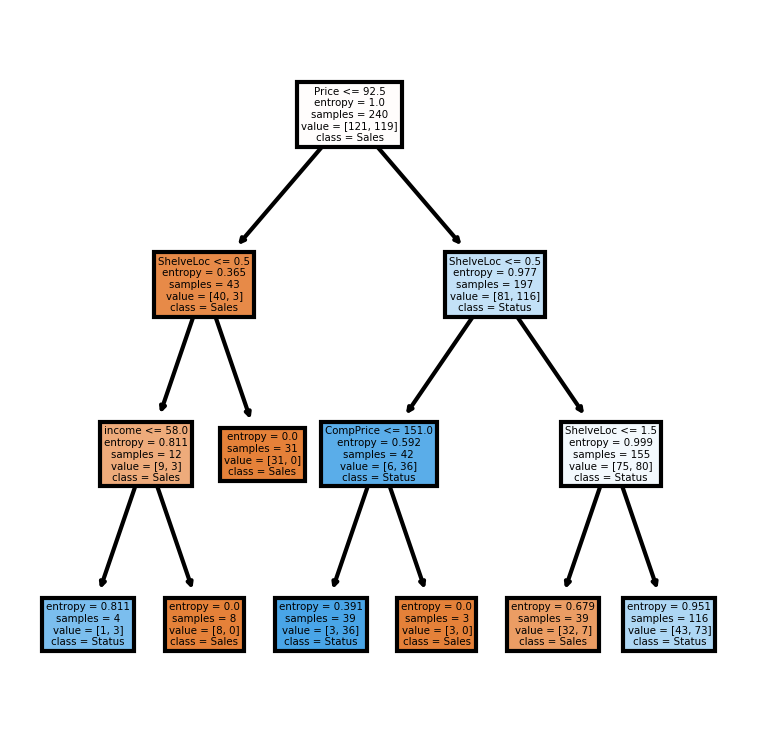

In [145]:
fn=['CompPrice','income','Advertising','Population','Price','ShelveLoc','Age','Education']
cn=['Sales','Status']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [146]:
model.feature_importances_ 

array([0.11328944, 0.07665685, 0.        , 0.        , 0.37559424,
       0.43445947, 0.        , 0.        ])

In [147]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

ShelveLoc      0.434459
Price          0.375594
CompPrice      0.113289
income         0.076657
Education      0.000000
Age            0.000000
Population     0.000000
Advertising    0.000000
dtype: float64

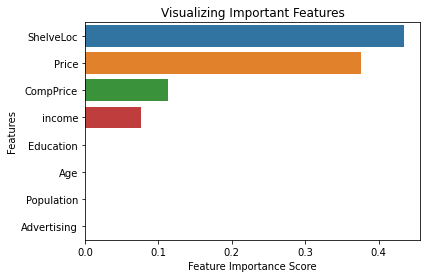

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [149]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    113
0     47
dtype: int64

In [150]:
preds 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0])

In [151]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Status,,
0,40,45
1,7,68


In [152]:
# Accuracy 
np.mean(preds==y_test)

0.675

In [153]:
#Building Decision Tree Classifier (CART) using Gini Criteria

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [154]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [155]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.675